In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


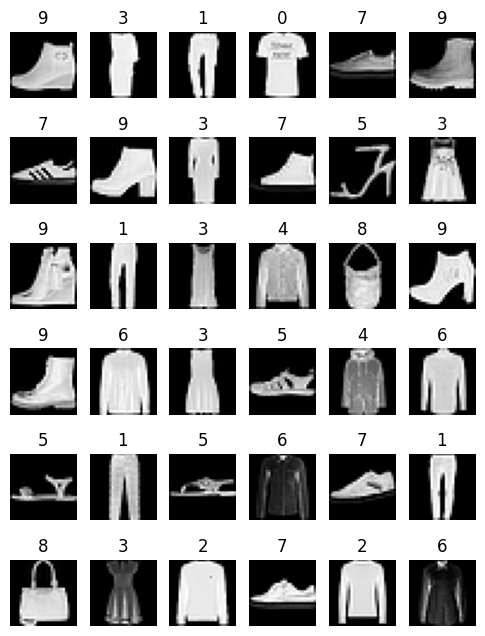

In [2]:
plt.figure(1,(6,8))
np.random.seed(5)
for i in range(1,37):
    temp = np.random.randint(0,60000)
    im = xtrain[temp,:,:]
    lab = ytrain[temp]
    plt.subplot(6,6,i)
    plt.imshow(im, cmap='gray')
    plt.title(lab)
    plt.axis('off')
    plt.show

In [3]:

nn_model = keras.Sequential() # create an empty neural network feed forward

#framework
nn_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2]))) #input layer

nn_model.add(keras.layers.Dense(128,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu')) #hidden layer

nn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) #output layer

#add optimizer
nn_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(nn_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 201866 (788.54 KB)
Trainable params: 201866 (788.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
#train the model
history = nn_model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7527 - accuracy: 0.7465
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4839 - accuracy: 0.8313
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4345 - accuracy: 0.8464
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4062 - accuracy: 0.8570
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3837 - accuracy: 0.8632
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3680 - accuracy: 0.8675
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3535 - accuracy: 0.8733
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3420 - accuracy: 0.8760
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3317 - accuracy: 0.8812
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.322

Text(0, 0.5, 'Accuracy')

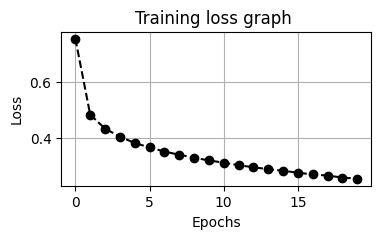

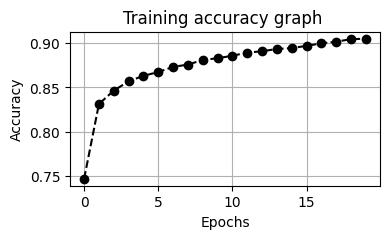

In [5]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [6]:
#evaluate the test data

[loss, acc] = nn_model.evaluate(xtest, ytest)
print(f"Test loss: {loss}")
print(f"Test accuracy: {acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8777
Test loss: 0.33899784088134766
Test accuracy: 0.8776999711990356
